### <font color='blue'>  <h1><center>Tweets Classification </center></h1> </font> 

> ### Reading all tweets from twitter home page is pretty difficult with ragard to users who want to read every thing, and this is due to the huge amount of tweets being tweeted every single day.
> ### we'll try here to make it easy for a user to make him know as much possible as he him self can actually do.
> ### to do that we'll need to get a bunch of tweets from the Twitter API and split them into a number of classes , each class will contain similar tweets and then we'll give the user back one tweet from each class.

>> ## <font color='gray'>  Step 1 : Data Collection  </font> 

---

### To get the tweets from twitter API we will be using tweepy library but we need to have a twitter developer account  from which we will get our personal credentiels to be able to consume the api, i already have a developer account, if you don't have one check the link of twitter api documentation below :
#### https://developer.twitter.com/en/docs/twitter-api

In [1]:
import tweepy


#### once you are done with creating your developer account you should have your consumer key, consumer secret and access tokens. Keep these two handy, you’ll need them
#### The next step is creating an OAuthHandler instance using the library we just imported, into this we pass our consumer key and secret

In [2]:
consumer_key = 'dVaIpTVIDLBIyUGGt7pSUpQYZ'
consumer_secret = 'XRIQBNdwqaOfQhmcF1YDbaZHOAIq9vvBCxalQD58xCRdWD2PpT'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

#### Now we need to set our access tokens to be able to access the data 

In [3]:
access_token = '3502469121-BXzN9GPwvuvcHRn2aGbdwCjJEXg1oWfdaM7K6wx'
access_token_secret = '1VER81qFXcOUwsQvDviQVqXl2KGPC81GExyYHC1OMyRle'
auth.set_access_token(access_token, access_token_secret)

#### So now that we have our OAuthHandler equipped with an access token, we are ready for business


In [4]:
api = tweepy.API(auth, wait_on_rate_limit=True)


### <span style='background:yellow'>Note : that you can get your access_token directly from your account  </span>


#### Now road is open to make our requests to get our data and process it so let's get our hands dirty with some code 


#### Here we'll load all the tweets for the last 24 hours for the users  followed by the authenticating user(My account in our case) and stock them in a dataframe called home_data


### <span style='background:yellow'>this line returns the authenticated user’s information: </span>
```python 
print(api.me()) 
``` 




### <span style='background:yellow'>loading data may take several minutes </span>

In [5]:
import pandas as pd
home_data = pd.DataFrame(columns = ['date','text'])

In [6]:
from datetime import datetime, timedelta
yesterday = datetime.now() - timedelta(1)
## here we'll get the list of the current user's friends
screen_name= 'abdeltif2013'
friends = api.friends_ids(screen_name = screen_name)
i=0
for friend in friends:
    for tweet in api.user_timeline(id = friend, count = 40, tweet_mode="extended"):
        if(tweet.created_at > yesterday):
            i = i+1
            home_data.loc[i,'date'] = tweet.created_at
            home_data.loc[i,'text'] = tweet.full_text
print(str(i)+" tweets have been successfully loaded")

11454 tweets have been successfully loaded


In [30]:
#home_data.to_csv('home_data.csv', index=False)

In [6]:
#home_data = pd.read_csv('home_data.csv', index_col=0)

---

>> ## <font color='gray'> Step 2 : Data preprocessing </font>

---

#### Data preprocessing is a crucial step for building a machine learning model as it makes data suitable for the model to be training on, but first we'll get a glimpse of our data by showing the first 5 samples.

### <span style='background:pink'> Data Undrestanding </span>


In [7]:
home_data.head()

,date,text
1,2020-11-12 10:00:01,10 مباريات تنطلق اليوم في تصفيات كأس الأمم الإ...
2,2020-11-12 09:21:31,91’ ⚽️ — 2-2 | أوبيانج يعادل النتيجة!\n92’ 🔄 ...
3,2020-11-11 22:24:55,📽️ ملخص المباراة: \n\n🇱🇾 ليبيا 2-3 غينيا الاست...
4,2020-11-11 21:15:13,نتائج مباريات اليوم من تصفيات كأس أمم إفريقيا ...
5,2020-11-11 20:00:01,🎥 ملخص المباراة: \n\n🇲🇷 موريتانيا 1-1 بوروندي ...


#### oubviously our data frame composed of two columns : the tweet text and when this tweet has been created, see more information about data below

In [8]:
print('our data frame has {} rows and {} columns'.format(home_data.shape[0],home_data.shape[1]))

our data frame has 11454 rows and 2 columns


In [9]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11454 entries, 1 to 11454
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    11454 non-null  object
 1   text    11454 non-null  object
dtypes: object(2)
memory usage: 268.5+ KB


---

### <span style='background:pink'> Cleaning data </span>

### <span style='background:yellow'>here we'll see if our data has null or duplicated values and we delete them </span>

In [10]:
print('there is {} null values in our date column'.format(home_data['date'].isna().sum()))
print('there is {} null values in our text column'.format(home_data['text'].isna().sum()))

there is 0 null values in our date column
there is 0 null values in our text column


In [11]:
home_data['text'].duplicated().sum()

104

### <span style='background:yellow'>we have some duplicated tweets we'll delete them </span>

In [12]:
home_data = home_data.drop_duplicates(subset=['text'], keep=False)
home_data['text'].duplicated().sum()

0

#### what we need to do next is to clean the tweets and for that we'll define a function to delete useless text from the tweets like tags, links, emojis,...
#### also we'll replace contractions (he's ==> he is) with formal words because we need them later

In [13]:
import re
def clean_tweet(text):
    text = text.lower()
    # Removing english language contractions
    text = re.sub(r"i'm","i am", text)
    text = re.sub(r"he's","he is", text)
    text = re.sub(r"she's","she is", text)
    text = re.sub(r"that's","that is", text)
    text = re.sub(r"what's","what is", text)
    text = re.sub(r"where's","where is", text)
    text = re.sub(r"\'ll"," will", text)
    text = re.sub(r"\'ve"," have", text)
    text = re.sub(r"\'re"," are", text)
    text = re.sub(r"\'d"," would", text)
    text = re.sub(r"won't","will not", text)
    text = re.sub(r"can't","cannot", text)
    # Removing french language contractions
    text = re.sub(r"c'est","ce est", text)
    text = re.sub(r"voilà","vois la", text)
    text = re.sub(r"voici","vois ci", text)
    # delete hashtags
    text = re.sub(r"#+","#",text)
    text = re.sub(r"#(\w+)([^ ]*) "," ",text)
    # delete tags
    text = re.sub(r"@+","@",text)
    text = re.sub(r"@(\w+)([^ ]*) "," ",text)
    # delete links
    text = re.sub(r"http\S+", "", text)
    # Delete emojis 
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r'',text)
    # Delete other symbols
    text = re.sub(r"[-()\"#/@;:<>{}+=~|.?,]", "", text)
    return text

#### <span style='background:yellow'> here we apply the function above to the text column of our tweets </span>

In [14]:
home_data['text'] = home_data['text'].apply(clean_tweet)

In [15]:
home_data.head()

,date,text
1,2020-11-12 10:00:01,10 مباريات تنطلق اليوم في تصفيات كأس الأمم الإ...
2,2020-11-12 09:21:31,91’ ⚽️ — 22 أوبيانج يعادل النتيجة!\n92’ — ...
3,2020-11-11 22:24:55,️ ملخص المباراة \n\n ليبيا 23 غينيا الاستوائية...
4,2020-11-11 21:15:13,نتائج مباريات اليوم من تصفيات كأس أمم إفريقيا ...
5,2020-11-11 20:00:01,ملخص المباراة \n\n موريتانيا 11 بوروندي \n\n


---

### <span style='background:pink'> Natural Language Processing :</span> 
#### some changes need to be performed on our data and to do that we we'll use the nltk library so we need to install it first

### <span style='background:yellow'>the two lines below will do the trick: </span>
```python 
import nltk
nltk.download('all)
``` 

In [16]:
import nltk
#nltk.download('all')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#### we'll use here a text Text Normalization technique called  Lemmatization to change some inflected words (words have same root) to a single root word
#### stop words will be used too to keep only important key words in each of the three languages the tweets written with(english, arabic and french)

In [18]:
lemmatizer = WordNetLemmatizer()
sentences = []
all_words = []
for row in home_data.itertuples():
    if row[2] != '':
        words = nltk.word_tokenize(row[2])
        words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
        words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('arabic'))]
        words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('french'))]
        sentence = ' '.join(words)
        sentences.append((sentence))
        all_words += words


### <span style='background:pink'> visualizing the most occured words in tweets :</span> 

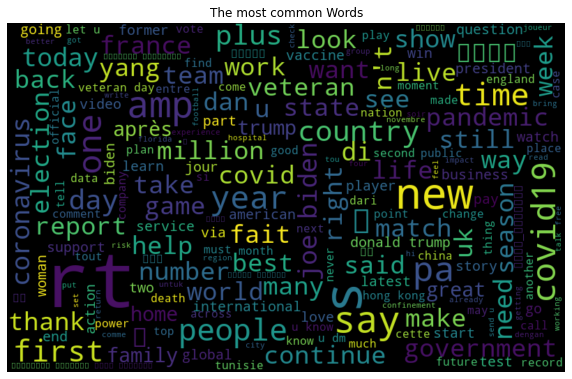

In [19]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in all_words])
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The most common Words')
plt.show()

---

>> ## <font color='gray'>  Step 3 : Model Building (clustering)  </font> 

---

### For a better understanding for the whole process of KMeans Classifier  we'll define the classifier on our own, first we'll define some functions we'll use them later while defining the classifier and then we'll give the user one tweet from each class

In [20]:
### ************ is_coverged to check if the centroids converge *****************************
### *****************************************************************************************
def is_converged(prev_centroid, new_centroids):

    # false if lengths are not equal
    if len(prev_centroid) != len(new_centroids):
        return False

    # iterate over each entry of clusters and check if they are same
    for c in range(len(new_centroids)):
        if " ".join(new_centroids[c]) != " ".join(prev_centroid[c]):
            return False

    return True

### ************ assign each tweet to its closest centroid *********************************
### *****************************************************************************************
def assign_cluster(tweets, centroids):

    clusters = dict()

    # for every tweet iterate each centroid and assign closest centroid to a it
    for t in range(len(tweets)):
        min_dis = math.inf
        cluster_idx = -1;
        for c in range(len(centroids)):
            dis = getDistance(centroids[c], tweets[t])
            # look for a closest centroid for a tweet

            if centroids[c] == tweets[t]:
                # print("tweet and centroid are equal with c: " + str(c) + ", t" + str(t))
                cluster_idx = c
                min_dis = 0
                break

            if dis < min_dis:
                cluster_idx = c
                min_dis = dis

        # randomise the centroid assignment to a tweet if nothing is common
        if min_dis == 1:
            cluster_idx = rd.randint(0, len(centroids) - 1)

        # assign the closest centroid to a tweet
        clusters.setdefault(cluster_idx, []).append([tweets[t]])
        # print("tweet t: " + str(t) + " is assigned to cluster c: " + str(cluster_idx))
        # add the tweet distance from its closest centroid to compute sse in the end
        last_tweet_idx = len(clusters.setdefault(cluster_idx, [])) - 1
        clusters.setdefault(cluster_idx, [])[last_tweet_idx].append(min_dis)

    return clusters

### ************ update centroids : tweet which has the lowest distance sum with all other tweets **************
### *******************************************************************************************************

def update_centroids(clusters):

    centroids = []

    # iterate each cluster and check for a tweet with closest distance sum with all other tweets in the same cluster
    # select that tweet as the centroid for the cluster
    for c in range(len(clusters)):
        min_dis_sum = math.inf
        centroid_idx = -1

        # to avoid redundant calculations
        min_dis_dp = []

        for t1 in range(len(clusters[c])):
            min_dis_dp.append([])
            dis_sum = 0
            # get distances sum for every of tweet t1 with every tweet t2 in a same cluster
            for t2 in range(len(clusters[c])):
                if t1 != t2:
                    if t2 < t1:
                        dis = min_dis_dp[t2][t1]
                    else:
                        dis = getDistance(clusters[c][t1][0], clusters[c][t2][0])

                    min_dis_dp[t1].append(dis)
                    dis_sum += dis
                else:
                    min_dis_dp[t1].append(0)

            # select the tweet with the minimum distances sum as the centroid for the cluster
            if dis_sum < min_dis_sum:
                min_dis_sum = dis_sum
                centroid_idx = t1

        # append the selected tweet to the centroid list
        centroids.append(clusters[c][centroid_idx][0])

    return centroids
### ************ getDistance : distance between two tweets using jaccard distance **************
### *******************************************************************************************************

def getDistance(tweet1, tweet2):

    # get the intersection
    intersection = set(tweet1).intersection(tweet2)

    # get the union
    union = set().union(tweet1, tweet2)

    # return the jaccard distance
    if (len(union) != 0):
        return 1 - (len(intersection) / len(union))
    else :
        return 1

### ************ compute_SSE : compute the squared sum error :: sum of distances of all tweets to their centroids ***********
### *******************************************************************************************************
def compute_SSE(clusters):

    sse = 0
    # iterate every cluster 'c', compute SSE as the sum of square of distances of the tweet from it's centroid
    for c in range(len(clusters)):
        for t in range(len(clusters[c])):
            sse = sse + (clusters[c][t][1] * clusters[c][t][1])

    return sse
### ************ compute_SSE : compute the sum squared error :: sum of distances of all tweets to their centroids ***********
### *******************************************************************************************************

#### Using all functions above we are going to build our KMeans model
#### The model will return the clusters, the error function and the centroids of the clusters

In [21]:

def k_means(tweets, k=4, max_iterations=50):

    centroids = []

    # initialization, assign random tweets as centroids
    count = 0
    hash_map = dict()
    while count < k:
        random_tweet_idx = rd.randint(0, len(tweets) - 1)
        if random_tweet_idx not in hash_map:
            count += 1
            hash_map[random_tweet_idx] = True
            centroids.append(tweets[random_tweet_idx])

    iter_count = 0
    prev_centroids = []

    # run the iterations until not converged or until the max iteration in not reached
    while (is_converged(prev_centroids, centroids)) == False and (iter_count < max_iterations):

        print("running iteration " + str(iter_count))

        # assignment, assign tweets to the closest centroids
        clusters = assign_cluster(tweets, centroids)

        # to check if k-means converges, keep track of prev_centroids
        prev_centroids = centroids

        # update, update centroid based on clusters formed
        centroids = update_centroids(clusters)
        iter_count = iter_count + 1

    if (iter_count == max_iterations):
        print("max iterations reached, K means not converged")
    else:
        print("converged")

    sse = compute_SSE(clusters)

    return clusters, sse, centroids


### <span style='background:pink'> Hyper-parameters-tuning :</span> 


In [22]:
import random as rd
import math
import string
# default number of experiments to be performed
experiments = 5
k = 10
best_k = k
step = 5
# for every experiment 'e', run K-means

for e in range(experiments):

    print("------ Running K means for experiment no. " + str((e + 1)) + " for k = " + str(k))

    clusters, sse, centroids = k_means(sentences, k)
    if(k == 10):
        min_sse = sse
    # for every cluster 'c', print size of each cluster
    for c in range(len(clusters)):
        print("**************************************************************")
        print("**************************************************************")
        print("cluster" + str(c+1) + ": ", str(len(clusters[c])) + " tweets")
        print("**************************************************************")
        print("tweet chosen of cluster " +str(c+1)+" is :: " + centroids[c])
    print("--> SSE : " + str(sse))
    print('\n')
    if(sse<min_sse):
        min_sse = sse
        best_k = k
    # increment k after every experiment
    k = k + step


------ Running K means for experiment no. 1 for k = 10
running iteration 0
running iteration 1
running iteration 2
converged
**************************************************************
**************************************************************
cluster1:  1342 tweets
**************************************************************
tweet chosen of cluster 1 is :: vocabulaire absurde hauts fonctionnaires plus ridicule 'les assises mobilité ' 'sauvegarde l'emploi ' dire qu'on va virer gen
**************************************************************
**************************************************************
cluster2:  640 tweets
**************************************************************
tweet chosen of cluster 2 is :: journal released chinese researcher find number norther china rise due 13th fiveyear plan chinese government implemented 2015 restore biodiversity area
**************************************************************
***********************************************

running iteration 1
running iteration 2
running iteration 3
converged
**************************************************************
**************************************************************
cluster1:  487 tweets
**************************************************************
tweet chosen of cluster 1 is :: الوزراء يتفقد مشروع إنشاء محطة ترشيح المياه السطحية بمنطقة الكاب بورسعيد
**************************************************************
**************************************************************
cluster2:  459 tweets
**************************************************************
tweet chosen of cluster 2 is :: après dernier confinement parisiens pris décision quitter ville débuter nouvelle vie plus apaisante campagne mer racontent reconfinement
**************************************************************
**************************************************************
cluster3:  456 tweets
**************************************************************
tweet chosen of cluster

running iteration 1
running iteration 2
running iteration 3
converged
**************************************************************
**************************************************************
cluster1:  1580 tweets
**************************************************************
tweet chosen of cluster 1 is :: hi leave home respite care care provided vulnerable person person disability find meeting others care section page thanks
**************************************************************
**************************************************************
cluster2:  61 tweets
**************************************************************
tweet chosen of cluster 2 is :: aymane serhani
**************************************************************
**************************************************************
cluster3:  1059 tweets
**************************************************************
tweet chosen of cluster 3 is :: n't go lockdown complete freeforall sage scientist sir mark wal

#### In the cell above we did some experiments : in each experiment we tested our model on k number of clusters , we computed the error function, we increased k and we finally took the best parameter to show the user the best tweets as below 

In [23]:
clusters, sse, centroids = k_means(sentences, best_k)
print("best model has "+str(len(clusters))+" clusters ::::::::::::::")
for c in range(len(clusters)):
    print("**************************************************************")
    print("**************************************************************")
    print("cluster" + str(c+1) + ": ", str(len(clusters[c])) + " tweets")
    print("**************************************************************")
    print("tweet chosen of cluster " +str(c+1)+" is :: " )
    print(centroids[c])

running iteration 0
running iteration 1
running iteration 2
converged
best model has 30 clusters ::::::::::::::
**************************************************************
**************************************************************
cluster1:  180 tweets
**************************************************************
tweet chosen of cluster 1 is :: 
man arrested suspicion arson offence
**************************************************************
**************************************************************
cluster2:  65 tweets
**************************************************************
tweet chosen of cluster 2 is :: 
l'oncle griezmann tacle barça messi ça travaille pa
**************************************************************
**************************************************************
cluster3:  21 tweets
**************************************************************
tweet chosen of cluster 3 is :: 
❤️
**************************************************************
***